# Relatório de Análise VII

## Criando Agrupamentos

In [23]:
import pandas as pd

In [24]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [25]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [26]:
dados.Valor.mean()

5046.172821405663

In [27]:
bairros = []
for bairro in dados['Bairro']:
    bairros.append(bairro)

In [28]:
selecao = dados.Bairro.isin(bairros)
dados = dados[selecao]

In [29]:
dados.Bairro.drop_duplicates()

0             Copacabana
1        Jardim Botânico
2                 Centro
3           Higienópolis
4               Cachambi
              ...       
13855          Bancários
15277         Cavalcanti
15280       Rio da Prata
15412      Cidade Jardim
16428        Coelho Neto
Name: Bairro, Length: 152, dtype: object

In [30]:
grupo_bairro = dados.groupby('Bairro')

In [31]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [32]:
grupo_bairro.groups

{'Abolição': [1553, 3184, 6655, 6951, 7634, 10138, 13165, 14187, 16054, 16639, 17139, 18797, 18805, 20106, 21387], 'Alto da Boa Vista': [2201, 12039, 12556, 13240, 13438, 14518], 'Anchieta': [3017, 8880, 15660, 17811], 'Andaraí': [384, 452, 514, 613, 790, 846, 854, 996, 1191, 1416, 1421, 1685, 1912, 2014, 2683, 3137, 3216, 3489, 3578, 3738, 3856, 4227, 4572, 4773, 4876, 4883, 4961, 5545, 5753, 5990, 6232, 6450, 6529, 6911, 7168, 7408, 7889, 7890, 8064, 8430, 9190, 9290, 9334, 9380, 9713, 9929, 10104, 10255, 10275, 10859, 10940, 10947, 11079, 11516, 11818, 12292, 12762, 13243, 13385, 13389, 13769, 13897, 13931, 13938, 14214, 14592, 14668, 15915, 16009, 16504, 16509, 16599, 16654, 17510, 17769, 17794, 17913, 18212, 18433, 18754, 18888, 18918, 19041, 19668, 19750, 19770, 20100, 20219, 20516, 20866, 21028, 21074, 21114, 21326, 21455, 21543, 21582], 'Anil': [241, 572, 604, 1227, 1632, 1664, 1789, 1932, 2127, 2378, 3586, 3675, 3860, 4153, 4369, 4651, 4769, 4790, 5261, 5340, 5660, 6130, 6150,

In [33]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data.Valor.mean()))

Abolição -> 1195.3333333333333
Alto da Boa Vista -> 3966.6666666666665
Anchieta -> 875.0
Andaraí -> 1464.7113402061855
Anil -> 2048.8732394366198
Arpoador -> 12923.916666666666
Bancários -> 1825.0
Bangu -> 1016.0
Barra da Tijuca -> 7069.552938130986
Barra de Guaratiba -> 5550.0
Benfica -> 996.0
Bento Ribeiro -> 1030.8695652173913
Bonsucesso -> 1225.9322033898304
Botafogo -> 8791.828178694159
Braz de Pina -> 1115.0
Cachambi -> 1157.1742424242425
Cachamorra -> 3000.0
Cacuia -> 916.6666666666666
Caju -> 850.0
Camorim -> 1735.2272727272727
Campinho -> 1037.3333333333333
Campo Grande -> 1267.71714922049
Cascadura -> 948.7096774193549
Catete -> 2267.0625
Catumbi -> 1112.5
Cavalcanti -> 595.0
Centro -> 1254.7521865889212
Cidade Jardim -> 12000.0
Cidade Nova -> 1471.4285714285713
Cocotá -> 1883.3333333333333
Coelho Neto -> 700.0
Colégio -> 885.0
Copacabana -> 4126.677004538578
Cordovil -> 905.5555555555555
Cosme Velho -> 5343.548387096775
Cosmos -> 658.3333333333334
Curicica -> 1514.5657894736

In [34]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Abolição,1195.33,191.40
Alto da Boa Vista,3966.67,885.00
Anchieta,875.00,19.75
Andaraí,1464.71,497.71
Anil,2048.87,455.85
...,...,...
Vila Valqueire,1769.58,276.88
Vila da Penha,1260.58,232.68
Vista Alegre,1114.38,210.06


## Estatísticas Descritivas 

In [35]:
grupo_bairro.Valor.describe().roundd(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2048.87,1523.97,300.0,1100.0,1500.0,2675.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,1769.58,2203.01,800.0,1000.0,1250.0,1700.0,16000.0
Vila da Penha,104.0,1260.58,644.66,450.0,900.0,1100.0,1302.5,4500.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


In [36]:
grupo_bairro.Valor.aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Bairro,,
Abolição,800.0,2300.0
Alto da Boa Vista,600.0,15000.0
Anchieta,700.0,1000.0
Andaraí,700.0,2950.0
Anil,300.0,7000.0
...,...,...
Vila Valqueire,800.0,16000.0
Vila da Penha,450.0,4500.0
Vista Alegre,700.0,1400.0


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

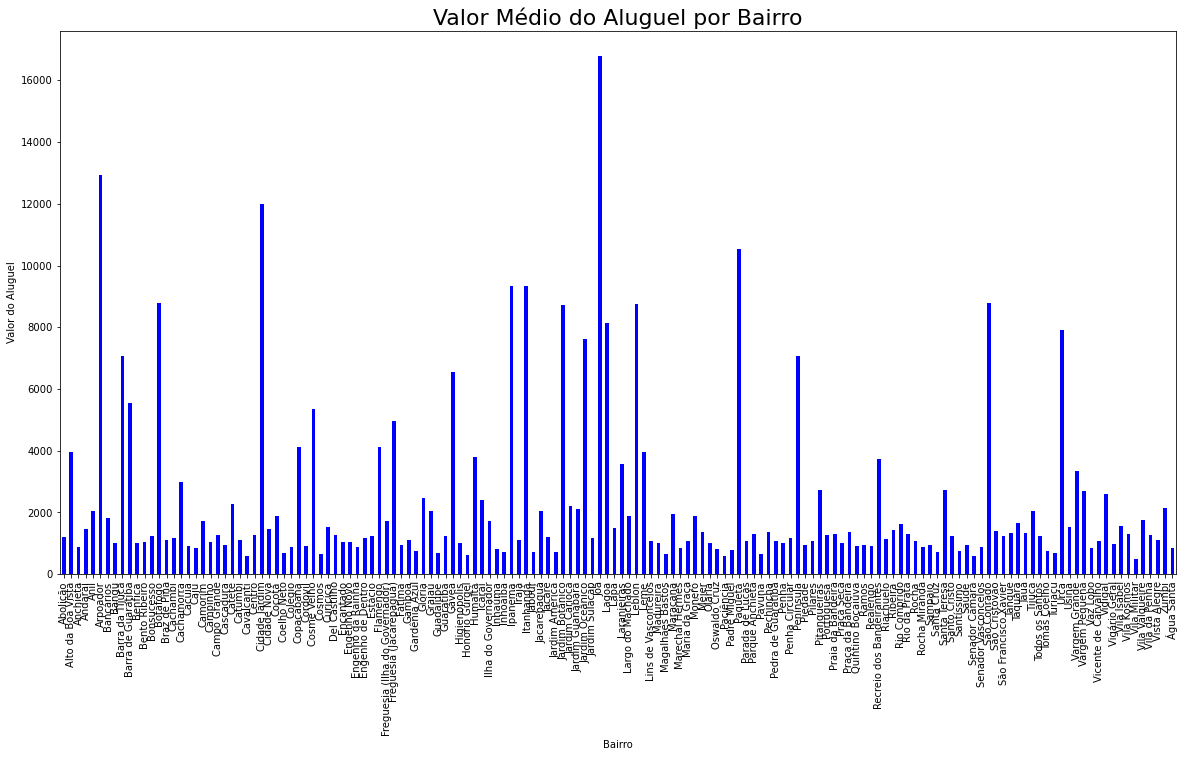

In [41]:
fig = grupo_bairro.Valor.mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

# Identificando e Removendo Outliers

<AxesSubplot:>

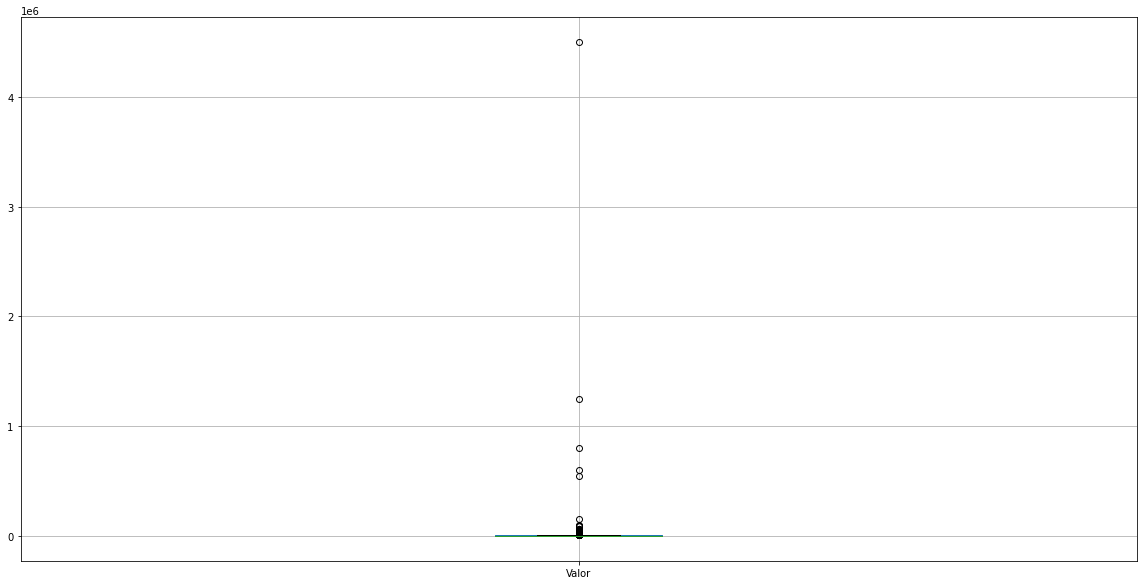

In [42]:
dados.boxplot(['Valor'])

In [43]:
dados[dados.Valor >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [44]:
valor = dados.Valor

In [50]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = (Q1 - 1.5 * IIQ)
limite_superior = (Q3 + 1.5 * IIQ)

In [51]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

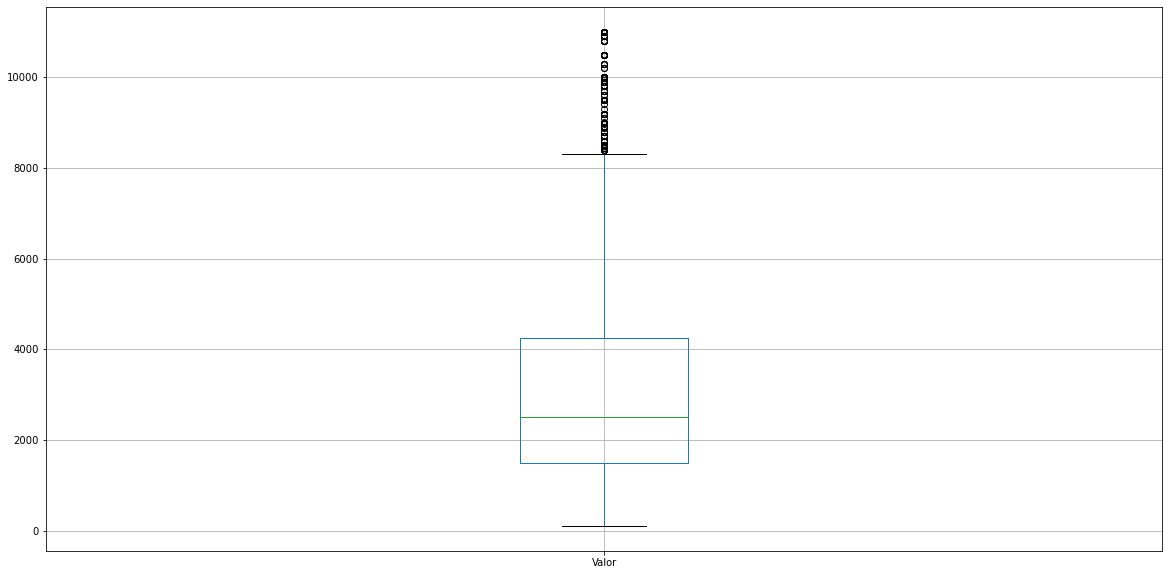

In [52]:
dados_new.boxplot(['Valor'])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

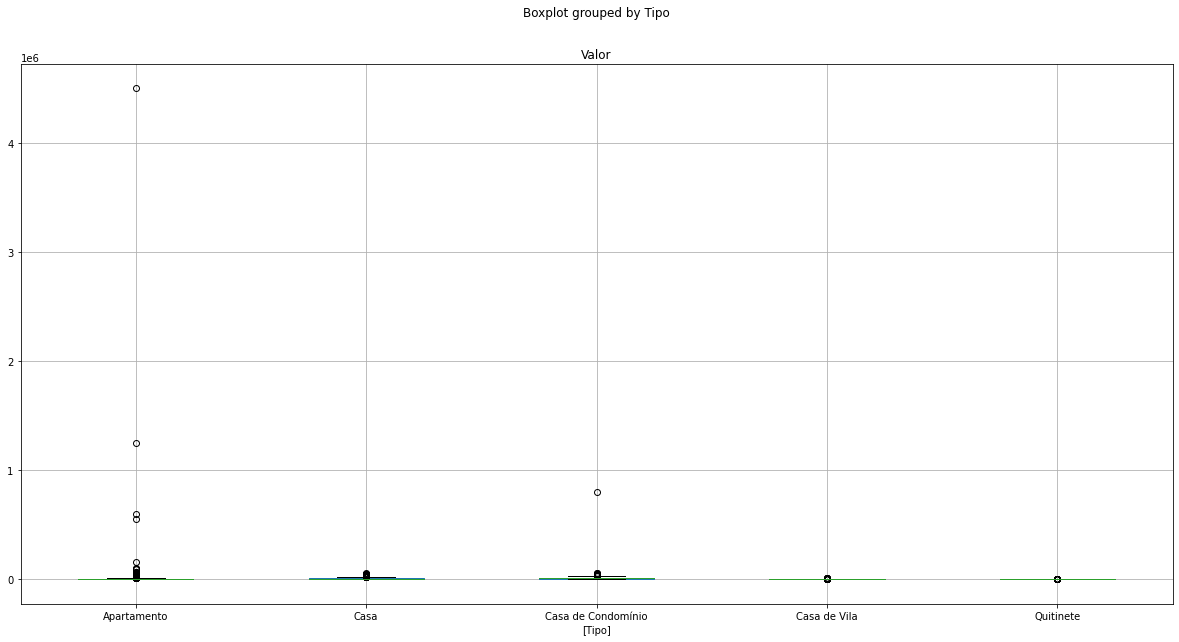

In [53]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [55]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [56]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, ...], 'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa 

In [57]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = (Q1 - 1.5 * IIQ)
limite_superior = (Q3 + 1.5 * IIQ)

In [58]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [59]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [60]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [61]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [62]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [65]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    esta_tipo = dados['Tipo'] == tipo
    esta_dentro_limite = (dados.Valor >= limite_inferior[tipo]) & (dados.Valor <= limite_superior[tipo])
    selecao = esta_tipo & esta_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

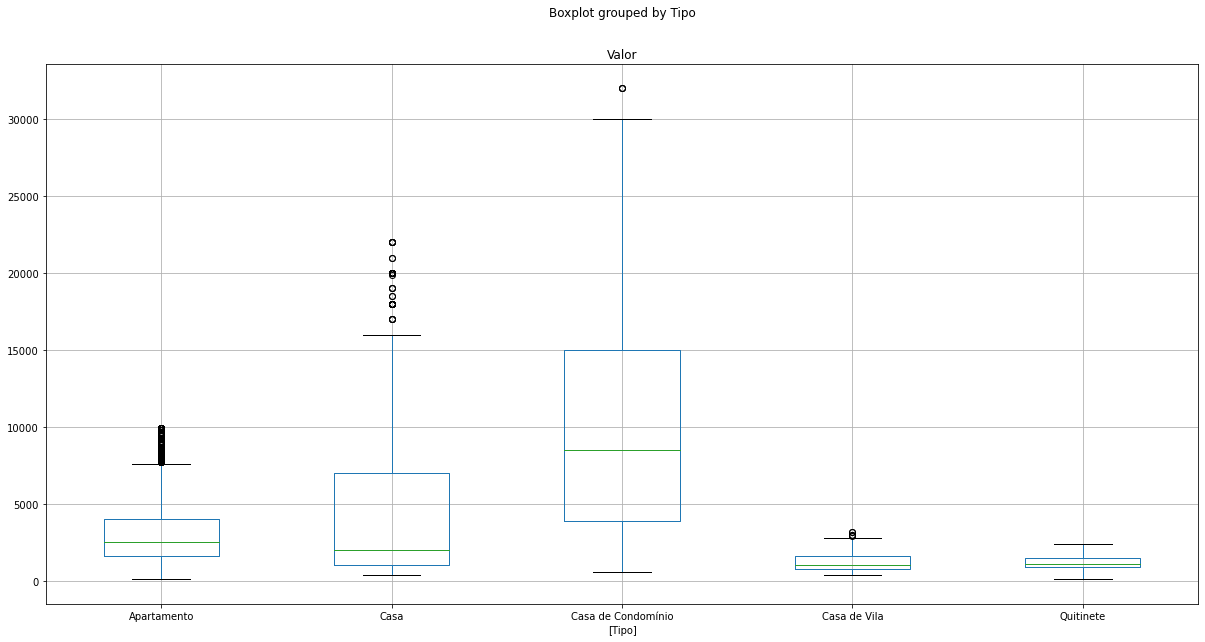

In [66]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [67]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)